引入库

In [2]:
import control as ct  # 控制系统库
import numpy as np    # 数值计算库
import matplotlib.pyplot as plt  # 绘图库

定义传递函数

In [9]:
num = [1]    # 分子多项式系数
den = [1]  # 分母多项式系数
sys = ct.tf(num, den) # 创建传递函数模型
print("传递函数 G(s) =", sys)

传递函数 G(s) = <TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
dt = None

  1
  -
  1


计算并绘制脉冲、阶跃、斜坡、加速度响应

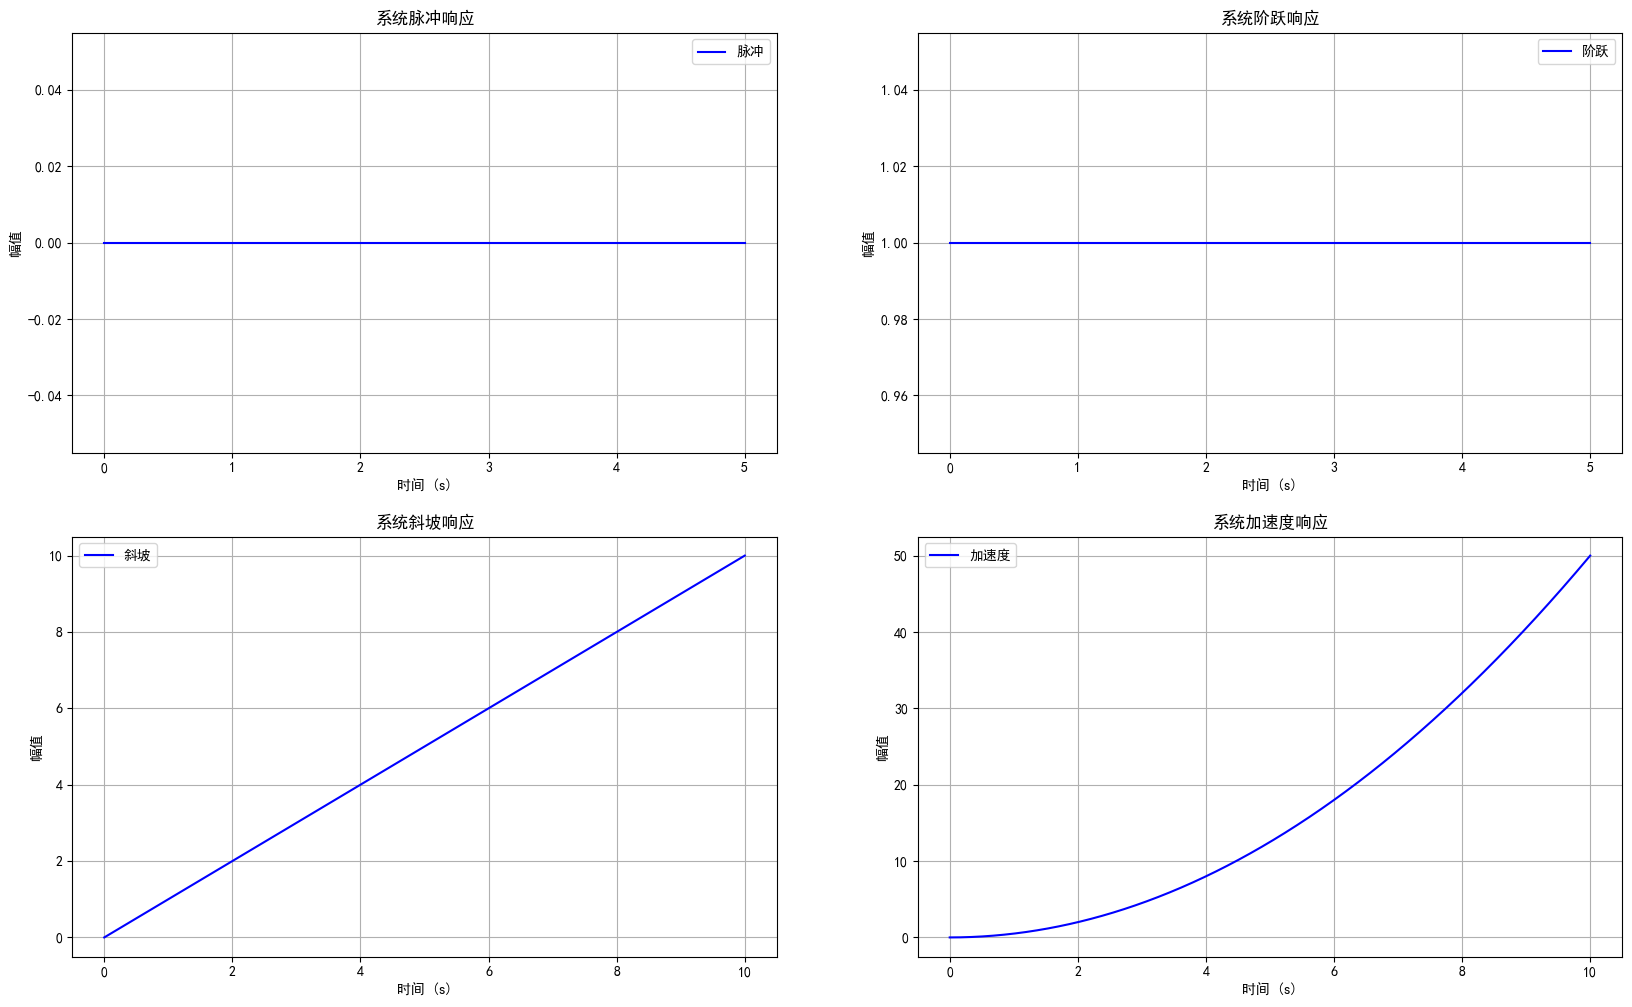

In [10]:
t1, y1 = ct.impulse_response(sys)# 计算脉冲响应
t2, y2 = ct.step_response(sys) # 计算阶跃响应
#计算斜坡响应
# 时间序列
t = np.linspace(0, 10, 1000)
# 生成斜坡输入信号 r(t) = t
u = t  # 斜坡输入
# 计算系统对斜坡输入的响应
t3, y3 = ct.forced_response(sys, T=t, U=u)
#计算加速度响应
#时间序列
t = t
u_accel = 0.5 * t**2
# 计算系统对加速度输入的响应
t4, y4 = ct.forced_response(sys, T=t, U=u_accel)

#绘制图像
plt.figure(figsize = (20, 12))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.subplot(2, 2, 1)
plt.plot(t1, y1, 'b', label='系统响应')
plt.xlabel('时间 (s)')
plt.ylabel('幅值')
plt.title('系统脉冲响应')
plt.legend(['脉冲'])
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(t2, y2, 'b', label='系统响应')
plt.xlabel('时间 (s)')
plt.ylabel('幅值')
plt.title('系统阶跃响应')
plt.legend(['阶跃'])
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(t3, y3, 'b', label='系统响应')
plt.xlabel('时间 (s)')
plt.ylabel('幅值')
plt.title('系统斜坡响应')
plt.legend(['斜坡'])
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(t4, y4, 'b', label='系统响应')
plt.xlabel('时间 (s)')
plt.ylabel('幅值')
plt.title('系统加速度响应')
plt.legend(['加速度'])
plt.grid(True)
plt.show()

脉冲响应图像修正

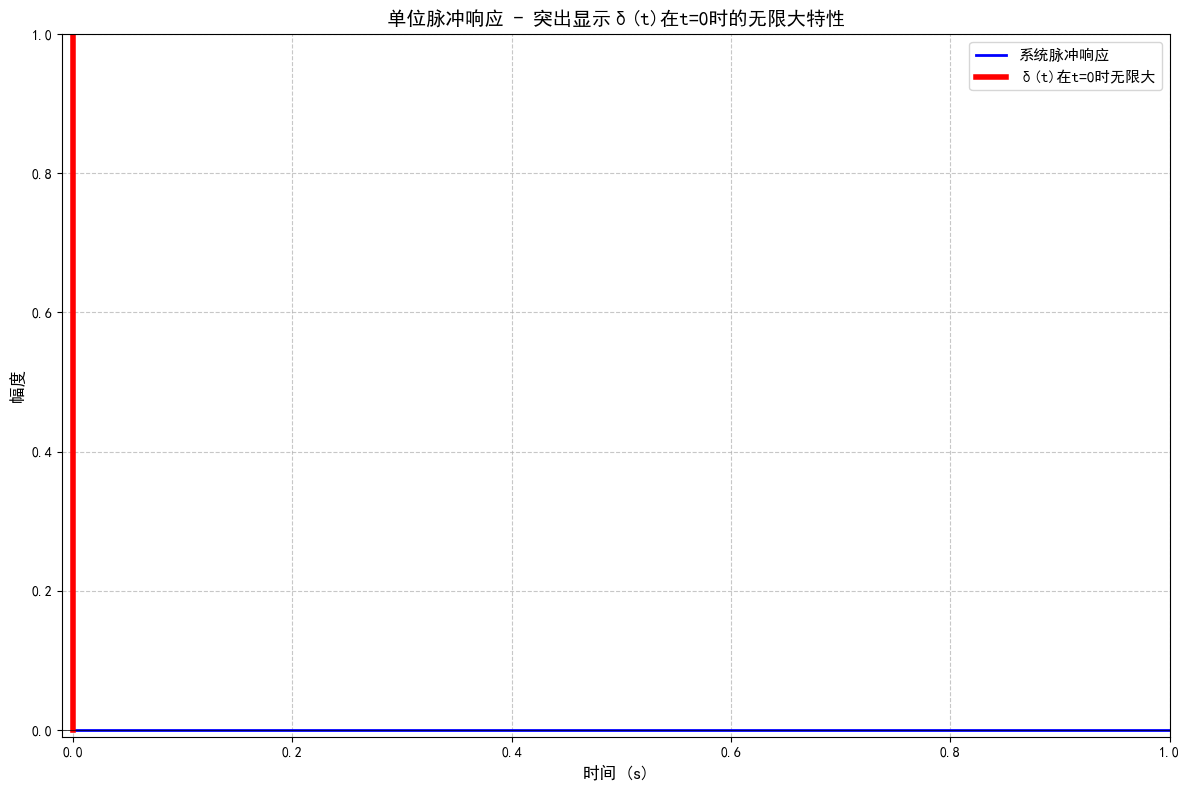

In [33]:
# 创建系统传递函数
sys = ct.tf([1], [1])

# 计算单位脉冲响应
t, y = ct.impulse_response(sys)

# 创建图形
plt.figure(figsize=(12, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 绘制脉冲响应
plt.plot(t, y, 'b-', linewidth=2, label='系统脉冲响应')

# 计算合适的箭头长度
max_y = np.max(y)
min_y = np.min(y)

if abs(max_y) < 1e-10:  # 如果所有响应值都接近0
    line_length = 2
else:
    line_length = max_y * 0.8

# 在t=0处添加垂直线段（只显示上半部分）
plt.plot([0, 0], [0, line_length], 'r-', linewidth=4, label='δ(t)在t=0时无限大')

# 设置坐标轴和标题
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('时间 (s)', fontsize=12)
plt.ylabel('幅度', fontsize=12)
plt.title('单位脉冲响应 - 突出显示δ(t)在t=0时的无限大特性', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11, loc='upper right')

# 只显示横轴上半部分
plt.ylim(-0.01, 1)  # 从0开始，只显示上半部分
plt.xlim(-0.01, 1)

plt.tight_layout()
plt.show()